In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

In [2]:
#specifying file to import model, where rb means "read binary"
import pickle
with open("RF_Model.pickle", "rb") as f:
  new_model = pickle.load (f)

In [3]:
#specifying file to import scaler, where rb means "read binary"
with open("scaler.pickle", "rb") as f:
  new_scaler = pickle.load (f)

In [4]:
new_retail_sales =pd.read_csv("/content/new_customers.csv")
new_retail_sales

,Gender,Age,Salary,Product ID,Price
0,Male,24,38652,3,4446
1,Female,47,64727,1,5188
2,Male,46,54648,1,6193
3,Male,31,20018,3,4779
4,Male,58,77731,2,6855
5,Male,28,55478,1,6153
6,Female,48,54211,2,7588
7,Male,31,60076,3,5238
8,Female,42,29290,1,5418
9,Male,50,21445,1,5598


In [5]:
len(new_retail_sales)

10

In [6]:
# using label encoder to convert categorical columns to dummy variable
le_gender = LabelEncoder()

In [7]:
#using fit_transform
new_retail_sales["Gender"] = le_gender.fit_transform(new_retail_sales["Gender"])

In [8]:
#checking dataframe
new_retail_sales

,Gender,Age,Salary,Product ID,Price
0,1,24,38652,3,4446
1,0,47,64727,1,5188
2,1,46,54648,1,6193
3,1,31,20018,3,4779
4,1,58,77731,2,6855
5,1,28,55478,1,6153
6,0,48,54211,2,7588
7,1,31,60076,3,5238
8,0,42,29290,1,5418
9,1,50,21445,1,5598


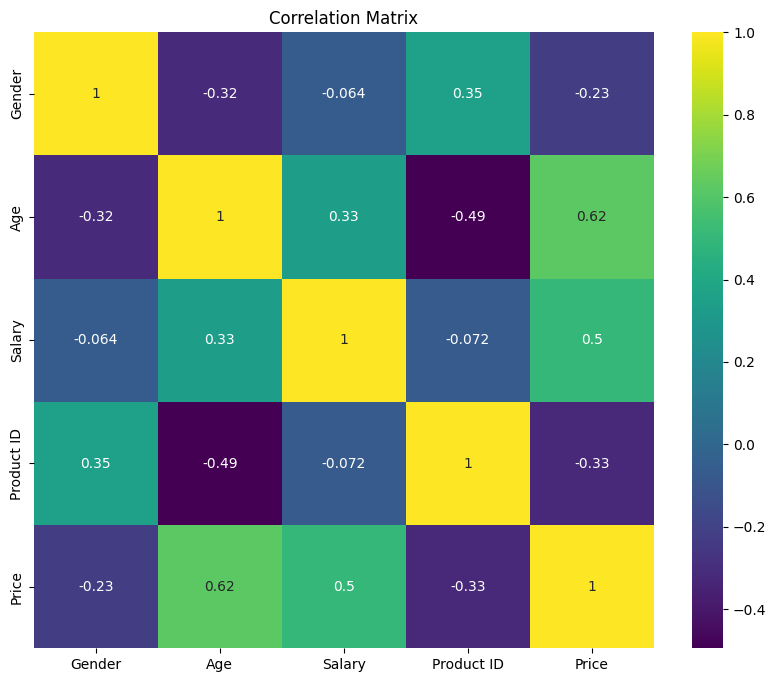

In [9]:
# correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(new_retail_sales.corr(), annot = True, cmap = "viridis")
plt.title('Correlation Matrix')
plt.show()

In [10]:
#specifying the independent columns and dropping the product ID column
new_x = new_retail_sales[["Gender", "Age", "Salary", "Price"]].to_numpy()
new_x

array([[    1,    24, 38652,  4446],
       [    0,    47, 64727,  5188],
       [    1,    46, 54648,  6193],
       [    1,    31, 20018,  4779],
       [    1,    58, 77731,  6855],
       [    1,    28, 55478,  6153],
       [    0,    48, 54211,  7588],
       [    1,    31, 60076,  5238],
       [    0,    42, 29290,  5418],
       [    1,    50, 21445,  5598]])

In [11]:
#scaling new x with imported scaler
new_x_scaled =  new_scaler.fit_transform(new_x)
new_x_scaled

array([[ 0.65465367, -1.54774434, -0.48875298, -1.42543997],
       [-1.52752523,  0.60971747,  0.93112246, -0.61159228],
       [ 0.65465367,  0.51591478,  0.38228547,  0.49072164],
       [ 0.65465367, -0.89112553, -1.50343981, -1.06019565],
       [ 0.65465367,  1.64154703,  1.63923599,  1.21682294],
       [ 0.65465367, -1.17253359,  0.42748189,  0.44684845],
       [-1.52752523,  0.70352015,  0.35848928,  2.02079916],
       [ 0.65465367, -0.89112553,  0.67785916, -0.55675079],
       [-1.52752523,  0.14070403, -0.99854681, -0.35932143],
       [ 0.65465367,  0.89112553, -1.42573465, -0.16189207]])

In [16]:
new_y_pred = new_model.predict(new_x_scaled)
new_y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

**The above result predicts that the new customers tested with the random forest model will not make purchase from the retail company**

In [13]:
#Including predicted result into to the dataframe as "Purchase" column
new_retail_sales["Purchase"] = new_y_pred

In [14]:
new_retail_sales

,Gender,Age,Salary,Product ID,Price,Purchase
0,1,24,38652,3,4446,0
1,0,47,64727,1,5188,0
2,1,46,54648,1,6193,0
3,1,31,20018,3,4779,0
4,1,58,77731,2,6855,0
5,1,28,55478,1,6153,0
6,0,48,54211,2,7588,0
7,1,31,60076,3,5238,0
8,0,42,29290,1,5418,0
9,1,50,21445,1,5598,0


In [17]:
#saving result as a csv file for company's use
new_retail_sales.to_csv("Model_Prediction.csv", index=False)